# IPL Winner Prediction

In [22]:
import numpy as np 
import pandas as pd

In [23]:
matches=pd.read_csv('C:/ipl.csv')
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [24]:
matches[pd.isnull(matches['winner'])] #Let's find all the matches with no result

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [25]:
#filling all NAN winner with DRAW
matches['winner'].fillna('Draw', inplace=True)

In [26]:
# Fiving Each team a discerte number for further processing
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

TeamCode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(TeamCode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [27]:
#Find cities which are null (Since there are some cities which are null)
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [28]:
#There are null cities because some ipl matches in 2014 happend in UAE hence filling null with dubai
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,5.417678,5.481802,5.365685,0.025997,5.218371,13.715771,3.363951,NaN
std,166.709828,2.486247,3.281985,3.291946,3.255295,0.159263,3.196267,23.619282,3.416049,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,8.000000,7.000000,7.000000,0.000000,7.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,13.000000,13.000000,13.000000,1.000000,14.000000,144.000000,10.000000,NaN


In [29]:
#dicVal is a dictionary for teams
dicVal = TeamCode['winner']
print(dicVal['CSK']) #print value from key
print(list(dicVal.keys())[list(dicVal.values()).index(5)])#find key by value
print(dicVal)

5
CSK
{'MI': 1, 'KKR': 2, 'RCB': 3, 'DC': 4, 'CSK': 5, 'RR': 6, 'DD': 7, 'GL': 8, 'KXIP': 9, 'SRH': 10, 'RPS': 11, 'KTK': 12, 'PW': 13, 'Draw': 14}


In [30]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
#we tool only the columns which are relevant to the outcome i.e winner
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5


In [31]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


In [35]:
#toss won and matches won
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)

print('No of toss won by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

print('\nNo of matches won by each team ')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))


No of toss won by each team
MI -> 74
KKR -> 69
CSK -> 66
KXIP -> 64
DD -> 64
RR -> 63
RCB -> 61
DC -> 43
SRH -> 30
PW -> 20
KTK -> 8
GL -> 8
RPS -> 7

No of matches won by each team 
MI -> 80
CSK -> 79
RCB -> 70
KKR -> 68
KXIP -> 63
RR -> 63
DD -> 56
SRH -> 34
DC -> 29
PW -> 12
GL -> 9
KTK -> 6
RPS -> 5
Draw -> 3


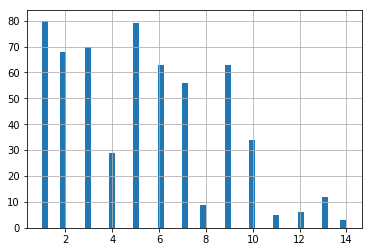

In [34]:
df['winner'].hist(bins=50) #most wins by a team (1-MI is the highest, 5-CSK is second highest)

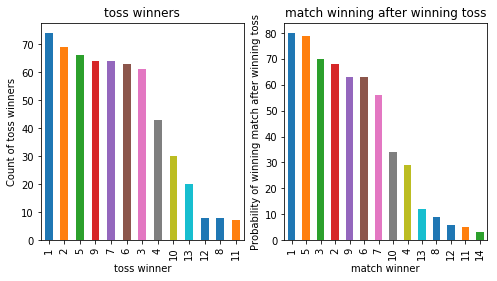

In [36]:
#trying to find the relation between toss winning and match winning
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('match winner')
ax2.set_ylabel('Probability of winning match after winning toss')
ax2.set_title("match winning after winning toss")
temp2.plot(kind = 'bar')


###### Hence Toss Winning doesn't mean match winning (afterall it's a T20 game)

In [37]:
df.dtypes

team1             int64
team2             int64
city             object
toss_decision    object
toss_winner       int64
venue            object
winner            int64
dtype: object

In [38]:
#since city,toss_decision and venue are object hence convert them to integers for modellng the data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
dtype: object

In [39]:
#building models to find the winner(Classification)-1)Logistic 2)RandomForest
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#classification models and finding their performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    
    train_target = data[outcome].iloc[train]
    
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome])

C:\ProgramData\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
#1-Logistic

outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 22.184%
Cross-Validation Score : 21.666%


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
#2-RandomForest

model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy : 89.601%


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y

Cross-Validation Score : 47.487%


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [42]:
#Random Forest Model got accuracy of 89.6% 


#TIME FOR SOME PRDICTION
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']#team1,team2,venue,toss winner,city,toss decision
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])#finding key i.e team name from value

KKR


In [44]:
#feature Importance
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input*100)

team2            25.362279
team1            21.142270
toss_winner      16.986581
venue            16.744162
city             16.069848
toss_decision     3.694860
dtype: float64


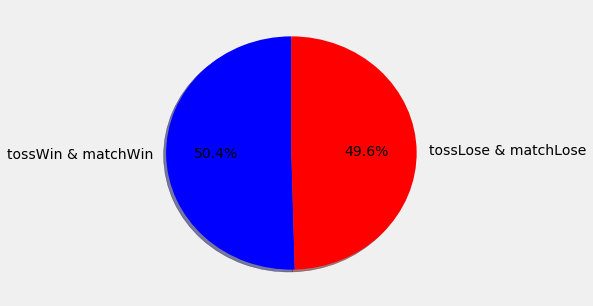

In [47]:
#toss and winning relation
plt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
plt.pie(slices,labels=['tossWin & matchWin','tossLose & matchLose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['b','r'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [ ]:
#toss decision has least effect on winning in an IPL game while venue is one of the most important feature 

In [48]:
# Let's Predict one more game
team1='CSK'
team2='MI'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','0']#team1,team2,venue,toss winner,city,toss decision
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])#finding key i.e team name from value

CSK
